# May 2015 Heroes of the Storm:
### Ranked Play Data 

This data is a collection of play from the competitive game mode of Heroes of the storm from May 2015. By analyzing it, we hope to figure out how to improve the matchmaking system, since players often complain about it. 

In [17]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import date

In [2]:
#read in the data
hldata = pd.read_csv('hotsdata/HeroLeagueData.csv')
hldata.head(10)

,Unnamed: 0,ReplayID,GameMode,Map,ReplayLength,Timestamp,Is Auto Select,Hero,Hero Level,Is Winner,MMR Before,Name,Group
0,0,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Rehgar,14,False,3170.0,Rehgar,Support
1,1,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Falstad,10,False,3330.0,Falstad,Assassin
2,2,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Jaina,7,True,3442.0,Jaina,Assassin
3,3,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Sylvanas,13,False,2666.0,Sylvanas,Specialist
4,4,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Zagara,10,True,3198.0,Zagara,Specialist
5,5,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Brightwing,11,True,2679.0,Brightwing,Support
6,6,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Diablo,7,False,1685.0,Diablo,Warrior
7,7,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Kerrigan,8,True,3683.0,Kerrigan,Assassin
8,8,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,E.T.C.,10,True,2626.0,E.T.C.,Warrior
9,9,23915730,4,Haunted Mines,720.0,5/14/2015 12:55:26 AM,False,Kael'thas,5,False,2200.0,Kael'thas,Assassin


In [3]:
hldata = hldata.rename(columns={'ReplayID':'replayid', 
                       'Map':'map', 
                       'ReplayLength':'length',
                       'Hero':'hero',
                       'Is Winner':'winner',
                       'MMR Before':'startmmr',
                        'Group':'role'})

In [4]:
hldata.columns

Index(['Unnamed: 0', 'replayid', 'GameMode', 'map', 'length', 'Timestamp',
       'Is Auto Select', 'hero', 'Hero Level', 'winner', 'startmmr', 'Name',
       'role'],
      dtype='object')

In [5]:
#drop unnecessary columns, the 2nd argument in the drop method is 0 for rows, 1 for columns
hldata.drop(['GameMode', 'Unnamed: 0', 'Is Auto Select', 'Name'], 1, inplace=True)

In [6]:
hldata.head(10)

,replayid,map,length,Timestamp,hero,Hero Level,winner,startmmr,role
0,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Rehgar,14,False,3170.0,Support
1,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Falstad,10,False,3330.0,Assassin
2,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Jaina,7,True,3442.0,Assassin
3,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Sylvanas,13,False,2666.0,Specialist
4,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Zagara,10,True,3198.0,Specialist
5,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Brightwing,11,True,2679.0,Support
6,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Diablo,7,False,1685.0,Warrior
7,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Kerrigan,8,True,3683.0,Assassin
8,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,E.T.C.,10,True,2626.0,Warrior
9,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Kael'thas,5,False,2200.0,Assassin


In [7]:
hldata.columns

Index(['replayid', 'map', 'length', 'Timestamp', 'hero', 'Hero Level',
       'winner', 'startmmr', 'role'],
      dtype='object')

In [8]:
#since there are 10 players in every game, 1 game is represented by 10 rows
#we divide the total number of rows by 10 to get the number of games included in the dataset
print('Total number of HL games: ' + str(int(len(hldata)/10)))

Total number of HL games: 187324


Each game is so infinitely complicated... it's not fully captured in this limited data, but there are still a lot of ways you could look at this data. For starters, let's calculate the average MMR of each team per game. 

There are two ways to look at each game. In terms of the individual players, or the whole of the teams. The data is composed of individuals, but it would make more sense to have each game stored with information about each team to look at it holistically.

In [9]:
gamecols = ['replayid', 'map', 'length', 'Timestamp', 'winnermmr', 'winnermmrstd', 'losermmr', 'losermmrstd', 'avgmmr']
gamedata = pd.DataFrame(columns = gamecols)
print(gamedata.head())

Empty DataFrame
Columns: [replayid, map, length, Timestamp, winnermmr, winnermmrstd, losermmr, losermmrstd, avgmmr]
Index: []


In [10]:
hldata.head()

,replayid,map,length,Timestamp,hero,Hero Level,winner,startmmr,role
0,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Rehgar,14,False,3170.0,Support
1,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Falstad,10,False,3330.0,Assassin
2,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Jaina,7,True,3442.0,Assassin
3,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Sylvanas,13,False,2666.0,Specialist
4,23915730,Haunted Mines,720.0,5/14/2015 12:55:26 AM,Zagara,10,True,3198.0,Specialist


In [11]:
print(gamedata)

Empty DataFrame
Columns: [replayid, map, length, Timestamp, winnermmr, winnermmrstd, losermmr, losermmrstd, avgmmr]
Index: []


In [13]:
ids = []
maps = []
lengths = []
times = []
wmmrs = []
wmmrstds = []
lmmrs = []
lmmrstds = []
avgmmrs = []
#each pass through the rows of the games, create the data to put in each column
#append to each list to populate the column with data

g = 0 
#iterate for every game
replays = hldata.replayid.unique()

while g < len(replays):
    playerdata = hldata[hldata.replayid == replays[g]]
    
    ids.append(playerdata.replayid[g*10])
    maps.append(playerdata.map[g*10])
    lengths.append(playerdata.length[g*10])
    times.append(playerdata.Timestamp[g*10])
    #the above lines of code covers the first 3 columns, the map, the length of the game, and the time the game started
    #now we just calculate the avg mmr for each team, and the avg mmr of the game
    winnermmr = playerdata[playerdata.winner==True].startmmr.mean()
    winnerstd = np.std(playerdata[playerdata.winner==True].startmmr)
    losermmr = playerdata[playerdata.winner==False].startmmr.mean()
    loserstd = np.std(playerdata[playerdata.winner==False].startmmr)
    gamemmr = (winnermmr + losermmr) / 2
    
    wmmrs.append(winnermmr)
    wmmrstds.append(winnerstd)
    lmmrs.append(losermmr)
    lmmrstds.append(loserstd)
    avgmmrs.append(gamemmr)
    g+=1
    
gamedata.replayid = ids
gamedata.map = maps
gamedata.length = lengths
gamedata.Timestamp = times
gamedata.winnermmr = wmmrs
gamedata.winnermmrstd = wmmrstds
gamedata.losermmr = lmmrs
gamedata.losermmrstd = lmmrstds
gamedata.avgmmr = avgmmrs

In [14]:
print(gamedata.head())

   replayid               map  length              Timestamp  winnermmr  \
0  23915730     Haunted Mines   720.0  5/14/2015 12:55:26 AM     3125.6   
1  23915740  Garden of Terror  1578.0  5/14/2015 12:55:27 AM     1686.6   
2  23924385  Garden of Terror  2077.0  5/14/2015 12:55:39 AM     2069.8   
3  23915858        Sky Temple  1352.0  5/14/2015 12:56:00 AM     1815.6   
4  23915915      Dragon Shire  1440.0  5/14/2015 12:56:01 AM     1616.8   

   winnermmrstd  losermmr  losermmrstd  avgmmr  
0    415.956055    2610.2   609.731219  2867.9  
1    233.435730    1442.2   355.552190  1564.4  
2    537.339148    2210.4    51.262462  2140.1  
3    436.319883    2143.8   105.637872  1979.7  
4    420.637326    1952.0   515.179580  1784.4  


In [20]:
print(stats.ttest_ind(gamedata.winnermmrstd.dropna(), gamedata.losermmrstd.dropna()))

Ttest_indResult(statistic=-2.837569160313265, pvalue=0.004546119029072331)


In [21]:
dates = []

for time in gamedata.Timestamp:
    thedate = time.split()[0]
    ymd = thedate.split('/')
    y = ymd[2]
    m = ymd[0]
    d = ymd[1]
    day = date(int(y), int(m), int(d))
    dates.append(day)


In [22]:
print(dates[:10])

[datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14), datetime.date(2015, 5, 14)]


In [23]:
datesframe = pd.DataFrame(dates)
datesframe.columns=['date']
print(datesframe.head())

         date
0  2015-05-14
1  2015-05-14
2  2015-05-14
3  2015-05-14
4  2015-05-14


In [24]:
gamedata = pd.concat([gamedata, datesframe], axis=1)
print(gamedata.head())

   replayid               map  length              Timestamp  winnermmr  \
0  23915730     Haunted Mines   720.0  5/14/2015 12:55:26 AM     3125.6   
1  23915740  Garden of Terror  1578.0  5/14/2015 12:55:27 AM     1686.6   
2  23924385  Garden of Terror  2077.0  5/14/2015 12:55:39 AM     2069.8   
3  23915858        Sky Temple  1352.0  5/14/2015 12:56:00 AM     1815.6   
4  23915915      Dragon Shire  1440.0  5/14/2015 12:56:01 AM     1616.8   

   winnermmrstd  losermmr  losermmrstd  avgmmr        date  
0    415.956055    2610.2   609.731219  2867.9  2015-05-14  
1    233.435730    1442.2   355.552190  1564.4  2015-05-14  
2    537.339148    2210.4    51.262462  2140.1  2015-05-14  
3    436.319883    2143.8   105.637872  1979.7  2015-05-14  
4    420.637326    1952.0   515.179580  1784.4  2015-05-14  


Average game length (seconds) for Haunted Mines: 1139.463262950136


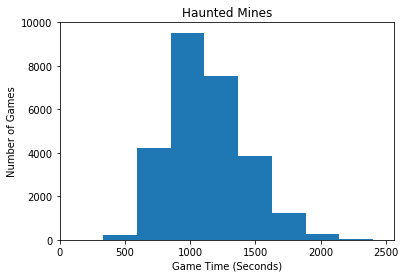

Average game length (seconds) for Garden of Terror: 1312.1875023330472


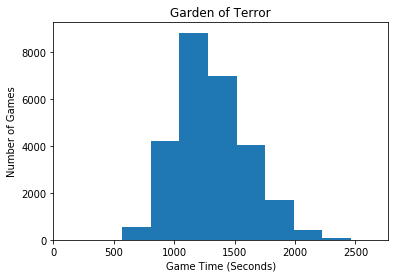

Average game length (seconds) for Sky Temple: 1125.5448845504036


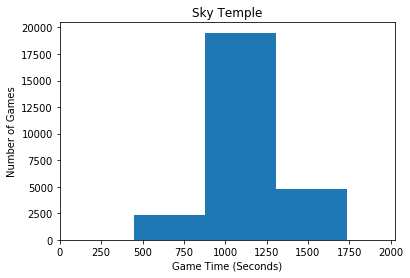

Average game length (seconds) for Dragon Shire: 1247.0247287691732


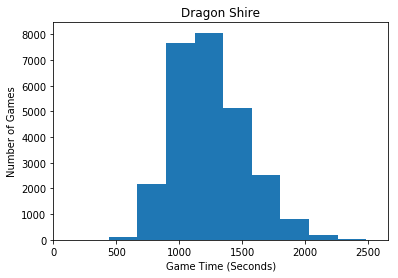

Average game length (seconds) for Blackheart's Bay: 1257.2441307522372


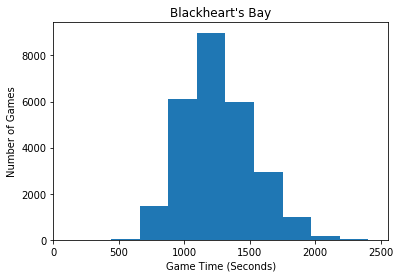

Average game length (seconds) for Tomb of the Spider Queen: 1253.4101356654332


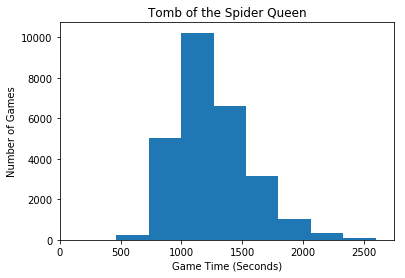

Average game length (seconds) for Cursed Hollow: 1206.2515920008937


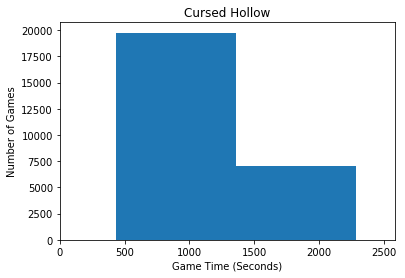

In [25]:
for bg in gamedata.map.unique():
    avglength = gamedata[gamedata.map==bg].length.mean()
    plt.hist(gamedata[gamedata.map == bg].length, bins=10)
    plt.title(bg)
    plt.xlabel('Game Time (Seconds)')
    plt.ylabel('Number of Games')
    plt.xlim(0, avglength + 5*(np.std(gamedata[gamedata.map==bg].length)))
    print('Average game length (seconds) for ' + bg +': ' + str(avglength))
    plt.show()

Average game length (seconds) for Haunted Mines: 1139.463262950136
Average MMR of games on Haunted Mines: 2138.087800969677


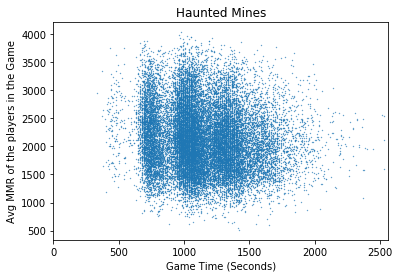

Average game length (seconds) for Garden of Terror: 1312.1875023330472
Average MMR of games on Garden of Terror: 2142.0972232521735


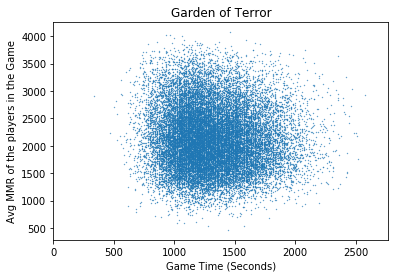

Average game length (seconds) for Sky Temple: 1125.5448845504036
Average MMR of games on Sky Temple: 2144.778558707807


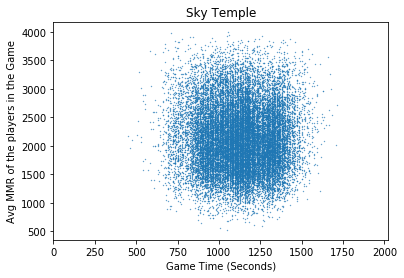

Average game length (seconds) for Dragon Shire: 1247.0247287691732
Average MMR of games on Dragon Shire: 2142.0358168909434


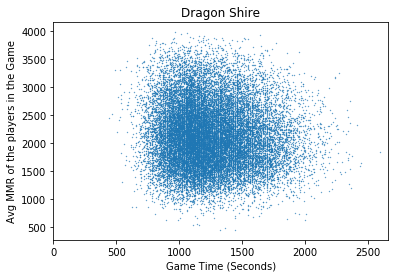

Average game length (seconds) for Blackheart's Bay: 1257.2441307522372
Average MMR of games on Blackheart's Bay: 2141.298457466606


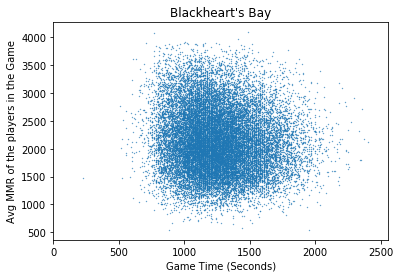

Average game length (seconds) for Tomb of the Spider Queen: 1253.4101356654332
Average MMR of games on Tomb of the Spider Queen: 2138.4913499938243


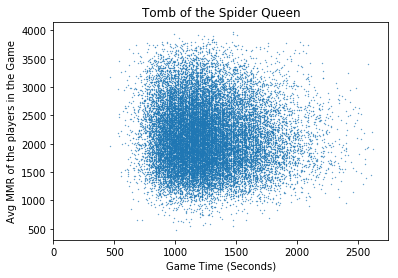

Average game length (seconds) for Cursed Hollow: 1206.2515920008937
Average MMR of games on Cursed Hollow: 2141.743167803996


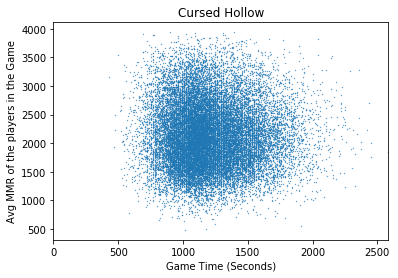

In [26]:
for bg in gamedata.map.unique():
    avglength = gamedata[gamedata.map==bg].length.mean()
    avgmmr = gamedata[gamedata.map==bg].avgmmr.mean()
    plt.scatter(gamedata[gamedata.map==bg].length, gamedata[gamedata.map==bg].avgmmr, s=.1)
    plt.title(bg)
    plt.xlabel('Game Time (Seconds)')
    plt.ylabel('Avg MMR of the players in the Game')
    plt.xlim(0, avglength + 5*(np.std(gamedata[gamedata.map==bg].length)))
    print('Average game length (seconds) for ' + bg +': ' + str(avglength))
    print('Average MMR of games on ' + bg + ': ' + str(avgmmr))
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

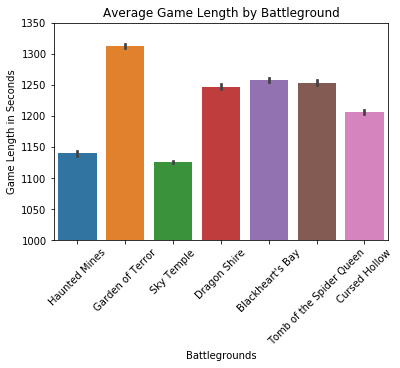

In [27]:
sns.barplot(x = 'map', y = 'length', data = gamedata)
plt.ylabel('Game Length in Seconds')
plt.xlabel('Battlegrounds')
plt.title('Average Game Length by Battleground')
plt.ylim(1000, 1350)
plt.xticks(rotation=45)

The ultimate goal of this research is to improve game quality. Unfortunately, this is an infinitely complicated problem, because one the problems you must solve in a matchmaking system is that you must find some way to quantify a player's skill in the game, and this is extremely difficult to do precisely. There are many variables involved in each game, not all of which are recorded here, and if that data was available, it would be better to look at the data grouped by those variables. I would propose doing it by finding patterns in the course of each game, and in the team compositions involved. For example, on certain maps, team compositions may consist of Heroes that accomplish X, Y, and Z. We can find patterns in the roles of each team, how long it takes, and how often each composition wins. Since this data only consists of the end result of each game, it's harder to produce an algorithm that analyzes individual performance in each game. Analyzing individual performance is essential to producing accurate matchmaking ratings, which is in turn necessary to create fun and balanced games. Currently, the end result of a game is the only metric used for matchmaking ratings, because with enough data, it becomes accurate. The simple elegance of this solution makes it an attractive option, but there isn't always enough data to support this measurement. And there may be some extent to which luck plays a significant factor in winrate.

This luck problem is one of the biggest problems complained about by players: the fact that matchmaking does not do a good job of putting similarly skilled players together. Since the game matches teams up by their average mmr, sometimes the skill gaps between individuals is quite large, even though the matchmaking system believes each team is balanced.

My hypothesis is that the teams with an above average standard deviation in their MMR will lose more than 50% of the time, and the teams with less deviation between their individual mmrs will be more likely to win. This hypothesis assumes that the average mmr of both teams will be about equal in each game. This is what the matchmaking system purportedly tries to accomplish, but inevitably cannot always succeed due to player availability. 

In order to run this experiment, we would rewrite the matchmaking algorithm to measure not only the average mmr of each team it matches together in Ranked modes, but also record the standard deviation of each team's mmr. This data would then later be separated by battleground. We will let the current matchmaking system remain for 90-95% of games, but 5-10% of games would run off a new matchmaking algorithm for the remainder of the current patch, which will match teams together with greater than average standard deviation in their mmr (the average standard deviation of teams is about 320). If there is a significant difference in the winrates of teams with above average mmr variance compared to the teams with lower mmr variance, then we will take action accordingly. 

There are 2 possible outcomes of this experiment: Either more variance in mmr on one side of the game is detrimental to winrate, or it doesn't matter. If having more mmr variance makes you more likely to lose, this will affect our future game design decisions because we know that we need to ensure games are balanced so players have a fun and fair experience. We could then shift our efforts to bringing about that environment. However, if we found there was no correlation between mmr variance and winrate, then it would indicate that the games were fair regardless of mmr variance, which could lead to quicker queue times because the matchmaker would have more leeway with which to match people in the same game. We will of course compare high variance vs low variance so we have a control. 

Before the next patch goes live, we would tally the data and see if we can find any patterns. Then, we would decide what to do next based on our results. If the data we collect shows that there is not a significant difference between the two populations of teams (above average variable mmr teams and less variable mmr teams), we would use this information to reduce wait times for games, which would lead to a better experience for players. If there is a significant difference between the two populations, we would conclude that we cannot sacrifice match quality for faster queue times, and then we would put our efforts towards getting more people into the ranked mode. More people means more competition, more granularity in skill levels, and more people available to match in games, thereby improving queue times and game quality. There are various ways to go about solving this problem however, many of which may require experiments of their own. 